## Intro to Python ~~ Exploration Data Analysis

In [1]:
import warnings as ws
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ws.filterwarnings("ignore")

In [2]:

url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
fuel_data.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [4]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [5]:
print(fuel_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB
None


In [6]:
fuel_data = fuel_data.astype({"report_year":"category", "fuel_type_code_pudl":"category"})
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   record_id                     29523 non-null  object  
 1   utility_id_ferc1              29523 non-null  int64   
 2   report_year                   29523 non-null  category
 3   plant_name_ferc1              29523 non-null  object  
 4   fuel_type_code_pudl           29523 non-null  category
 5   fuel_unit                     29343 non-null  object  
 6   fuel_qty_burned               29523 non-null  float64 
 7   fuel_mmbtu_per_unit           29523 non-null  float64 
 8   fuel_cost_per_unit_burned     29523 non-null  float64 
 9   fuel_cost_per_unit_delivered  29523 non-null  float64 
 10  fuel_cost_per_mmbtu           29523 non-null  float64 
dtypes: category(2), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


### Q1: Method of two list extension

In [7]:

A = [1,2,3,4,5,6]
B = [13, 21, 34]
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


### Q2: Matrix Identity 

In [8]:
I_1 = np.identity(3)
I_1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
I_2 = np.eye(3)
I_2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Q3: Which of the following fuel type code has the lowest average fuel cost per unit burned?


In [10]:

low_aver_fuel_cost = fuel_data.groupby("fuel_type_code_pudl")["fuel_cost_per_unit_burned"].mean().to_frame().reset_index()

low_aver_fuel_cost

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,67.421830
1,gas,13.659397
2,nuclear,4955.157002
3,oil,168.877086
4,other,18.253856
5,waste,19.518122


*The lower average fuel is gas*

### Q4: What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [11]:
round(fuel_data.describe(), 2)

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


*The standard deviation and the 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) are respectively 10.60 and 17.01*

### Q5: What is the skewness and kurtosis for the fuel quantity burned in two decimal places?


In [12]:

k = round(fuel_data.kurtosis(), 2)
s = round(fuel_data.skew(), 2)
print("\n Kurtosis")
print(k)
print("\n Skew")
print(s)



 Kurtosis
utility_id_ferc1                    1.09
fuel_qty_burned                   651.37
fuel_mmbtu_per_unit                55.60
fuel_cost_per_unit_burned         485.26
fuel_cost_per_unit_delivered    11765.05
fuel_cost_per_mmbtu             29489.13
dtype: float64

 Skew
utility_id_ferc1                  0.61
fuel_qty_burned                  15.85
fuel_mmbtu_per_unit               4.14
fuel_cost_per_unit_burned        19.79
fuel_cost_per_unit_delivered    105.01
fuel_cost_per_mmbtu             171.68
dtype: float64


*The skewness and kurtosis for the fuel quantity burned is respectively 15.85 and 651.37.*

### Q6: Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?


In [28]:

Feature = [col for col in fuel_data.columns if fuel_data[col].isnull().any()]
Total = fuel_data['fuel_unit'].isnull().sum()
percent = round(100*Total/len(fuel_data), 3)
print(f"Feature: {feature}, Total: {Total}, Percent: {percent} %")

Feature: ['fuel_unit'], Total: 180, Percent: 0.61 %


### Q7: The feature with missing values falls under what Categorical category and the missing value imputation technique used would be Mode imputation.

### Q8: Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

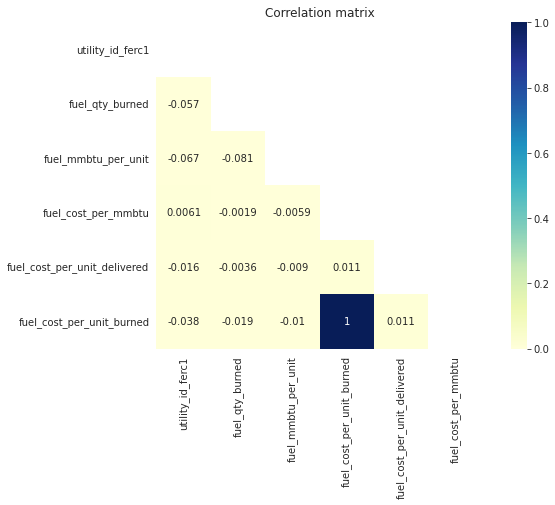

In [29]:
""" Mapping all variables correlation """
import seaborn as sns
import matplotlib.pyplot as plt
correlation = fuel_data.corr().sort_values(by="fuel_cost_per_unit_burned", ascending=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(correlation, cmap="YlGnBu", annot = True,
            mask=mask, square=True, vmin=0, vmax=1).set(title = 'Correlation matrix')

In [30]:
fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values(ascending=True)

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

*The second and third lowest correlation with the Fuel Cost Per Unit Burned are respectively fuel_qty_burned and fuel_mmbtu_per_unit.*

### Q9: For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [112]:

fuel_1994 = fuel_data[(fuel_data["fuel_type_code_pudl"] == "coal") & (fuel_data["report_year"] == 1994)]
fuel_1998 = fuel_data[(fuel_data["fuel_type_code_pudl"] == "coal") & (fuel_data["report_year"] == 1998)]

f_1998 = fuel_1998['fuel_cost_per_unit_burned'].sum()
f_1994 = fuel_1994['fuel_cost_per_unit_burned'].sum()

percent_change = round(100*(f_1998 - f_1994)/f_1994, 0)

print("The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is",int(percent_change),"%")

The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is -21 %


### Q10: Which year has the highest average fuel cost per unit delivered?

In [117]:

high_aver_fuel_cost_deliv = fuel_data.groupby("report_year")["fuel_cost_per_unit_delivered"].mean().to_frame().reset_index()

print(high_aver_fuel_cost_deliv.sort_values(by="fuel_cost_per_unit_delivered", ascending=False))

    report_year  fuel_cost_per_unit_delivered
3          1997                  11140.197239
2          1996                   9196.705948
6          2000                    985.362877
15         2009                    652.694163
24         2018                    499.269966
21         2015                    326.535511
4          1998                    287.154420
20         2014                    192.737183
19         2013                    172.307591
10         2004                    139.524275
22         2016                    103.901761
16         2010                     91.862105
0          1994                     63.636060
18         2012                     60.994502
7          2001                     60.050396
17         2011                     59.774667
14         2008                     58.588197
9          2003                     55.663493
8          2002                     47.594361
23         2017                     46.196861
13         2007                   

*1997 has the highest average fuel cost per unit delivered.*

### ---------Next step ------>